## Refs

Follow notebook `cat_dog_transfer_learning.ipynb`

In [ ]:
# from google.colab import drive
# # drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [1]:
# !ls drive/MyDrive/ML_colab/

dataset  datasetbeach_mountain	pretrained  save


In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import os

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
# local_weights_file = '../pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# local_weights_file = 'drive/MyDrive/ML_colab/pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [5]:
im_dim = (200, 200)
pre_trained_model = InceptionV3(input_shape = (200, 200, 3), 
                                include_top = False, 
                                weights = "imagenet")

# pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

In [6]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 10, 10, 768)


In [7]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.35)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=1e-5), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# !mv drive/MyDrive/ML_colab/datasetbeach_mountain/beach_mountain drive/MyDrive/ML_colab/dataset/

In [7]:
# only on colab
# import zipfile

# dataset_dir = 'drive/MyDrive/ML_colab/dataset'
# zip_file = dataset_dir + '/beach_mountain.zip'
# zip_ref = zipfile.ZipFile(zip_file, 'r')
# zip_ref.extractall(dataset_dir+'/b_m')
# zip_ref.close()

In [10]:
# !ls drive/MyDrive/ML_colab/dataset/b_m/beach_mountain/

train  validation


In [ ]:
# %%time
# import zipfile

# dataset_dir = 'drive/MyDrive/ML_colab/dataset'
# zip_file = dataset_dir + '/beach_mountain.zip'
# zip_ref = zipfile.ZipFile(zip_file, 'r')
# zip_ref.extractall("/tmp")
# zip_ref.close()

In [9]:
import os
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    lst_cat_imgs = os.listdir(SOURCE)
    lst_cat_imgs = random.sample(lst_cat_imgs, len(lst_cat_imgs))
    for file in lst_cat_imgs[:int(SPLIT_SIZE*len(lst_cat_imgs))]:
        source_file = os.path.join(SOURCE, file)
        destination_file = os.path.join(TRAINING, file)
        if os.path.getsize(source_file) > 0:
            copyfile(source_file, destination_file)
    for file in lst_cat_imgs[int(SPLIT_SIZE*len(lst_cat_imgs)):]:
        source_file = os.path.join(SOURCE, file)
        destination_file = os.path.join(TESTING, file)
        if os.path.getsize(source_file) > 0:
            copyfile(source_file, destination_file)

In [8]:
# # CAT -> beach
# CAT_SOURCE_DIR = "../dataset/beach_mountain_more/beach/"
# TRAINING_CATS_DIR = "../dataset/beach_mountain_more/train/beach/"
# TESTING_CATS_DIR = "../dataset/beach_mountain_more/validation/beach/"
# split_size = .9
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)

In [9]:
# # CAT -> mountain
# CAT_SOURCE_DIR = "../dataset/beach_mountain_more/mountain/"
# TRAINING_CATS_DIR = "../dataset/beach_mountain_more/train/mountain/"
# TESTING_CATS_DIR = "../dataset/beach_mountain_more/validation/mountain/"
# split_size = .9
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)

In [11]:
# # FOR test
# CAT_SOURCE_DIR = "../dataset/beach_mountain_more/beach/"
# TRAINING_CATS_DIR = "../dataset/beach_mountain_more/train/beach/"
# TESTING_CATS_DIR = "../dataset/beach_mountain_more/test/beach/"
# split_size = .973
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)

In [23]:
# local data

base_dir = "../dataset/beach_mountain_more"
# base_dir = "drive/MyDrive/ML_colab/dataset/beach_mountain"
# base_dir = "drive/MyDrive/ML_colab/dataset/b_m/beach_mountain/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_beach_dir = os.path.join(train_dir, 'beach')
train_moutain_dir = os.path.join(train_dir, 'mountain')

validation_beach_dir = os.path.join(validation_dir, 'beach')
validation_mountain_dir = os.path.join(validation_dir, 'mountain')

test_beach_dir = os.path.join(test_dir, 'beach')
test_moutain_dir = os.path.join(test_dir, 'mountain')

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

batch_size = 50
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    class_mode = 'binary', 
                                                    target_size = im_dim)

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size  = batch_size,
                                                         class_mode  = 'binary', 
                                                         target_size = im_dim)

Found 26446 images belonging to 2 classes.
Found 3020 images belonging to 2 classes.
Found 929 images belonging to 2 classes.


In [24]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size  = batch_size,
                                                         class_mode  = 'binary', 
                                                         target_size = im_dim)

Found 929 images belonging to 2 classes.


In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.97) :
            print("\nReached 96.0% accuracy so cancelling training!")
            self.model.stop_training = True

my_callback = myCallback()

In [16]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = validation_generator.n//validation_generator.batch_size,
            epochs = 100,
            validation_steps = validation_generator.n//validation_generator.batch_size,
            verbose = 2,
            callbacks=[my_callback])

Epoch 1/100
60/60 - 31s - loss: 0.4314 - accuracy: 0.8030 - val_loss: 0.2836 - val_accuracy: 0.8960
Epoch 2/100
60/60 - 27s - loss: 0.3295 - accuracy: 0.8643 - val_loss: 0.2401 - val_accuracy: 0.9057
Epoch 3/100
60/60 - 27s - loss: 0.3013 - accuracy: 0.8750 - val_loss: 0.2299 - val_accuracy: 0.9103
Epoch 4/100
60/60 - 27s - loss: 0.2716 - accuracy: 0.8840 - val_loss: 0.2152 - val_accuracy: 0.9197
Epoch 5/100
60/60 - 27s - loss: 0.2812 - accuracy: 0.8810 - val_loss: 0.1994 - val_accuracy: 0.9267
Epoch 6/100
60/60 - 27s - loss: 0.2699 - accuracy: 0.8833 - val_loss: 0.1833 - val_accuracy: 0.9300
Epoch 7/100
60/60 - 26s - loss: 0.2618 - accuracy: 0.8963 - val_loss: 0.1828 - val_accuracy: 0.9313
Epoch 8/100
60/60 - 26s - loss: 0.2284 - accuracy: 0.9060 - val_loss: 0.1924 - val_accuracy: 0.9263
Epoch 9/100
60/60 - 26s - loss: 0.2281 - accuracy: 0.9063 - val_loss: 0.1778 - val_accuracy: 0.9347
Epoch 10/100
60/60 - 26s - loss: 0.2376 - accuracy: 0.9067 - val_loss: 0.1983 - val_accuracy: 0.9267

In [29]:
saved_model_path = "../saved_model"

model.save(saved_model_path + '/SavedModel_100e_945_pre_imagenet_inceptionv3_200_moredata')
model.save(saved_model_path + '/model_100e_945_pre_imagenet_inceptionv3_200_moredata.h5')

# model.save("drive/MyDrive/ML_colab/save/beach_mountain/100epochs/SavedModel_100e_94")

INFO:tensorflow:Assets written to: ../saved_model/SavedModel_100e_945_pre_imagenet_inceptionv3_200_moredata/assets


In [2]:
!pwd

/learning/ds-sub/mountain-vs-beach-a-z-web/notebooks


In [ ]:
# Convert to TFJS
!cd ../saved_model
!tensorflowjs_converter --input_format=tf_saved_model --output_node_names='mountain_beach' --saved_model_tags=serve SavedModel_100e_945_pre_imagenet_inceptionv3_200_moredata web_model

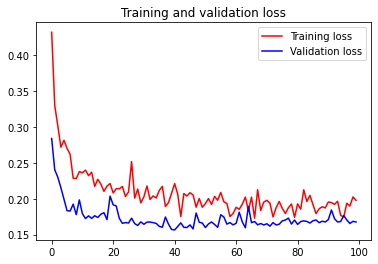

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# loss
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

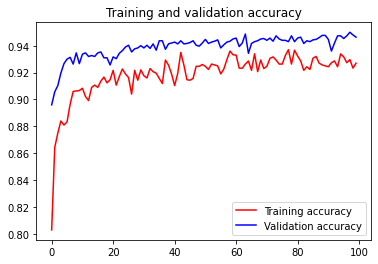

<Figure size 432x288 with 0 Axes>

In [18]:
# accuracy
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [25]:
test_generator.reset()
model.evaluate(test_generator)

19/19 [==============================] - 2s 107ms/step - loss: 0.1661 - accuracy: 0.9429


[0.1661180853843689, 0.9429494142532349]

In [21]:
# test_dir = os.path.join(base_dir, 'internet')

# test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# test_beach_dir = os.path.join(test_dir, 'beach')
# test_moutain_dir = os.path.join(test_dir, 'mountain')

# test_generator =  test_datagen.flow_from_directory(test_dir,
#                                                          batch_size  = batch_size,
#                                                          class_mode  = 'binary', 
#                                                          target_size = im_dim)

# test_generator.reset()
# model.evaluate(test_generator)

In [26]:
# check the labels
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'beach', 1: 'mountain'}

In [27]:
import numpy as np

In [28]:
# test_generator.reset()
# pred = model.predict(test_generator, verbose=1)
# predicted_class_indices=(pred>0.5).astype("int32")
# predictions = [labels[k[0]] for k in predicted_class_indices]
# predictions

In [30]:
im_dim

(200, 200)

In [31]:
from tensorflow.keras.preprocessing import image

In [39]:
# predict for an uploaded image
file_path = '../dataset/beach_mountain/internet/' # current dir
# file_path = '../dataset/beach_mountain/test/beach/' # current dir
# file_path = '../dataset/beach_mountain/test/mountain/' # current dir
test_files = os.listdir(file_path)

for file in test_files:
    # predicting images
    path=file_path + file
    img=image.load_img(path, target_size=im_dim)
    x=image.img_to_array(img)
    x=x/255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    classes = model.predict(images)
    classes = (classes > 0.5).astype("int32")[0][0]
#     print(classes)

    if classes>0:
        print(file + " is a mountain")
    else:
        print(file + " is a beach")

beach11.jpeg is a beach
mountain6.jpg is a mountain
mountain9.jpg is a mountain
beach9.jpg is a beach
beach12.jpeg is a beach
beach8.jpeg is a mountain
mountain2.jpg is a mountain
mountain5.jpg is a mountain
mountain1.jpg is a mountain
mountain5.jpeg is a mountain
beach1.jpg is a mountain
mountain3.jpg is a mountain
beach5.jpeg is a beach
beach3.jpg is a beach
mountain4.png is a beach
beach6.jpg is a beach
beach10.jpeg is a beach
beach4.jpeg is a beach
beach2.jpeg is a beach
beach7.jpeg is a beach
mountain8.jpeg is a mountain
mountain7.jpg is a mountain


In [37]:
# from an image
test_file = "../dataset/beach_mountain/internet/mountain1.jpg"
img = image.load_img(test_file, target_size=im_dim)
x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images)
classes = (classes > 0.5).astype("int32")[0]

if classes>0:
    print(test_file.split("/")[-1] + " is a mountain")
else:
    print(test_file.split("/")[-1] + " is a beach")

mountain1.jpg is a mountain


In [21]:
# model.save("drive/MyDrive/ML_colab/save/beach_mountain/100epochs/model_100e_94.h5")

In [ ]:
# keep colab alive
# while True:pass